# Transformação de imagens

Verificando versão instalada do OpenCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 1. Requerimentos

Utilize o comando ao lado para instalar pelo Anaconda terminal.

* OpenCV 3.4.3 (```conda install -c conda-forge opencv==3.4.3```)
* Matplotlib 3.1.3 (```conda install matplotlib==3.1.3```)
* Seaborn 0.0.10 (```conda install -c conda-forge seaborn==0.10.0```)
* Numpy 1.18.1 (```conda install numpy==1.15.2```)

In [3]:
if cv2.__version__ == "3.4.3":
    print("Versão correta ("+ cv2.__version__  +").")
else:
    print("Versão incorreta ("+ cv2.__version__  +"). Instale a versão conforme instruções.")

Versão correta (3.4.3).


## 2. Translação

Carregando uma imagem previamente existente

Text(0.5,1,'Robô')

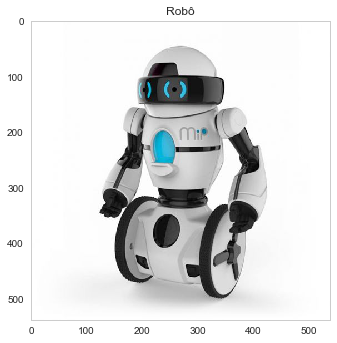

In [16]:
imagem = cv2.imread("imagens/robot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Robô")

Aplicando translação, sempre em paralelo nos eixos x e y. Neste caso utilizando valores positivos.

[[   1.     0.  -134.5]
 [   0.     1.  -134.5]]


Text(0.5,1,'Robô Translação')

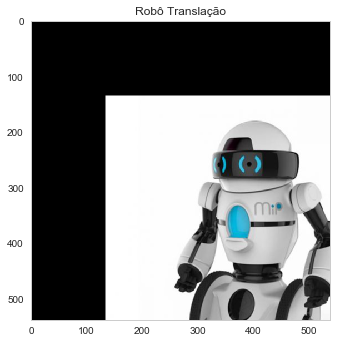

In [26]:
height, width = imagem.shape[:2]

#Vamos alterar o tamanho para a 25% do original
height_alterado, width_alterado = height/4, width/4

# Matriz de translação
matriz_translacao = np.float32([[1, 0, width_alterado],[0, 1, height_alterado]])

print(matriz_translacao)

imagem_transladada = cv2.warpAffine(imagem, matriz_translacao, (width, height))

plt.imshow(imagem_transladada)
plt.title("Robô Translação")

Aplicando translação no sentido inverso, utilizando valores negativos.

[[   1.     0.  -134.5]
 [   0.     1.  -134.5]]


Text(0.5,1,'Robô Translação')

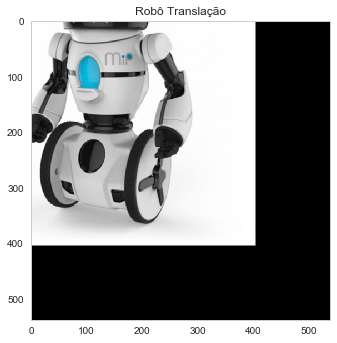

In [27]:
matriz_translacao = np.float32([[1, 0, -width_alterado],[0, 1, -height_alterado]])

# Matriz de translação
print(matriz_translacao)

imagem_transalada = cv2.warpAffine(imagem, matriz_translacao, (width, height))

plt.imshow(imagem_transalada)
plt.title("Robô Translação")

## 3. Rotação

Carregando uma imagem previamente existente

Text(0.5,1,'Robô')

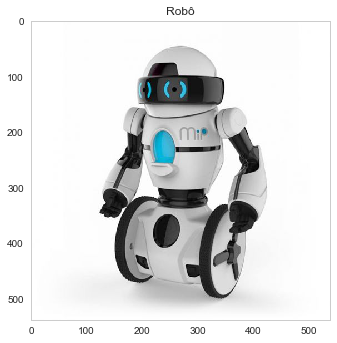

In [25]:
imagem = cv2.imread("imagens/robot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Robô")

Aplicando matriz de rotação e incluindo na transformação afim.

[[ 6.12323400e-17  1.00000000e+00 -5.68434189e-14]
 [-1.00000000e+00  6.12323400e-17  5.38000000e+02]]


Text(0.5,1,'Robô Rotacionado')

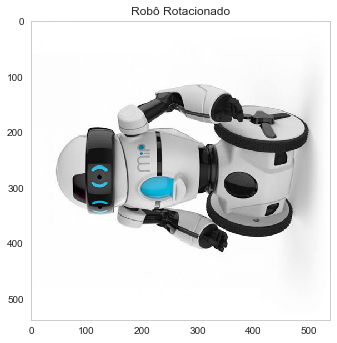

In [30]:
height, width = imagem.shape[:2]
matriz_rotacao = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (width, height))

print(matriz_rotacao)

plt.imshow(imagem_rotacionada)
plt.title("Robô Rotacionado")

Utilizando transposição de imagens. Método mais simples para rotações de ângulos retos.

Text(0.5,1,'Robô Rotacionado (por transposição)')

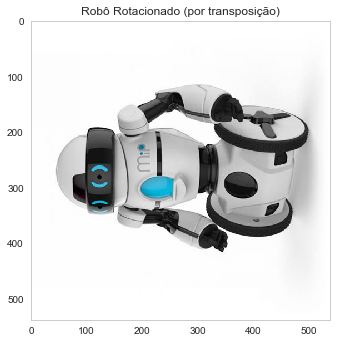

In [31]:
imagem_transposta = cv2.transpose(imagem)

plt.imshow(imagem_rotacionada)
plt.title("Robô Rotacionado (por transposição)")

## 4. Redimensionamento e Interpolação

O redimensionamento de imagens pode utilizar uma série de interpolações que servem para cobrir os pixels que são expandidos. Cada tipo de interpolação traz aspectos de maior nitidez e velocidade de processamento.

*Os experimentos abaixo foram adaptados deste [link](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms), de Anthony Tanbakuchi.*

Carregando uma imagem previamente existente

Text(0.5,1,'Café Original (Pequeno)')

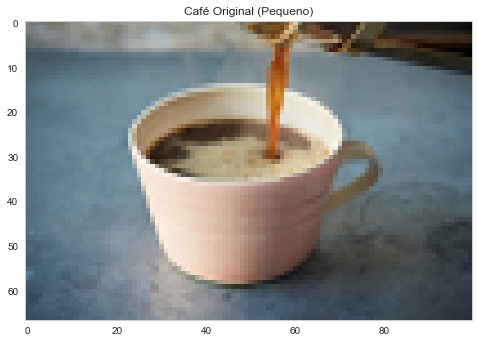

In [33]:
imagem = cv2.imread("imagens/coffee_small.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Café Original (Pequeno)")

Escala por fator (multiplicação)

Text(0.5,1,'Ampliação Lanczo')

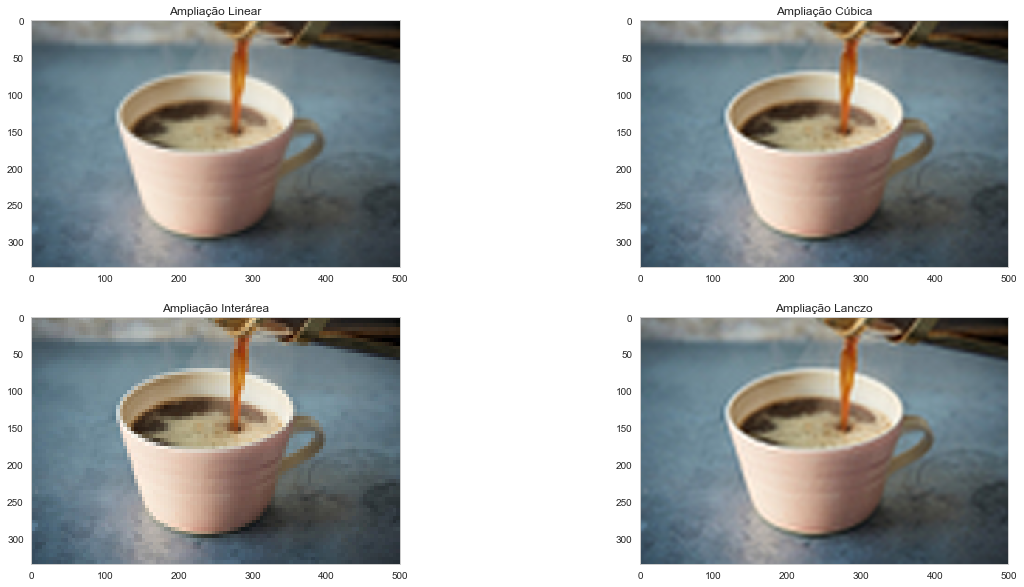

In [51]:
fator_x=5
fator_y=5

imagem_nova_linear = cv2.resize(imagem, None, fx=fator_x, fy=fator_y)
imagem_nova_cubica = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_CUBIC)
imagem_nova_area = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_AREA)
imagem_nova_lanczo = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem_nova_linear)
plt.title("Ampliação Linear")

plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Ampliação Cúbica")

plt.subplot(2,2,3)
plt.imshow(imagem_nova_area)
plt.title("Ampliação Interárea")

plt.subplot(2,2,4)
plt.imshow(imagem_nova_lanczo)
plt.title("Ampliação Lanczo")

Escala por novo tamanho.

Text(0.5,1,'Ampliação Lanczo')

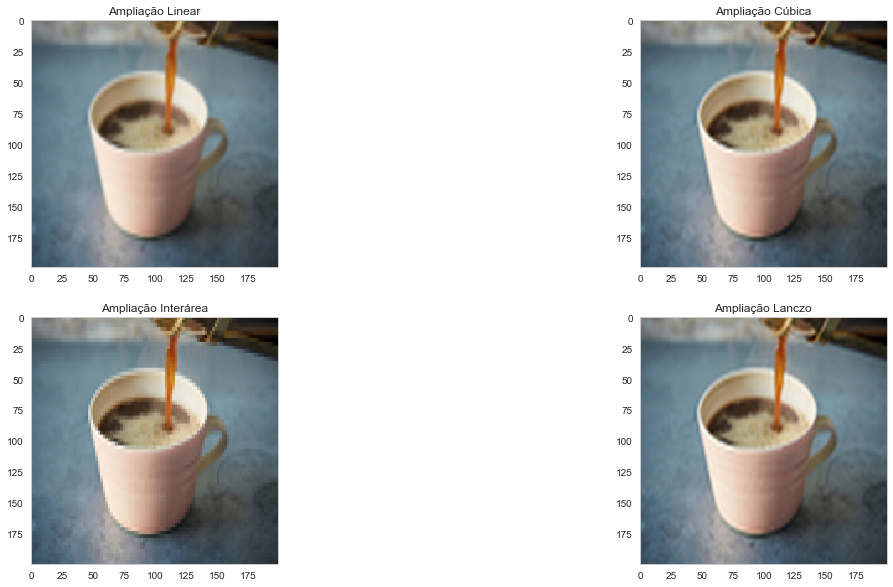

In [49]:
novo_tamanho = (200,200)

imagem_nova_linear = cv2.resize(imagem, novo_tamanho)
imagem_nova_cubica = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_CUBIC)
imagem_nova_interarea = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_AREA)
imagem_nova_lanczo = cv2.resize(imagem, novo_tamanho, interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem_nova_linear)
plt.title("Ampliação Linear")

plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Ampliação Cúbica")

plt.subplot(2,2,3)
plt.imshow(imagem_nova_interarea)
plt.title("Ampliação Interárea")

plt.subplot(2,2,4)
plt.imshow(imagem_nova_lanczo)
plt.title("Ampliação Lanczo")

Utilizando Image Pyramids para redimensionar imagens.
A cada passagem a imagem é aumentada (*pyrUp*) ou diminuída (*pyrDown*) em uma escala de 50%.

*Adaptado desta [documentação](https://docs.opencv.org/2.4/doc/tutorials/imgproc/pyramids/pyramids.html) do OpenCV*

Text(0.5,1,'Robô Passo 3')

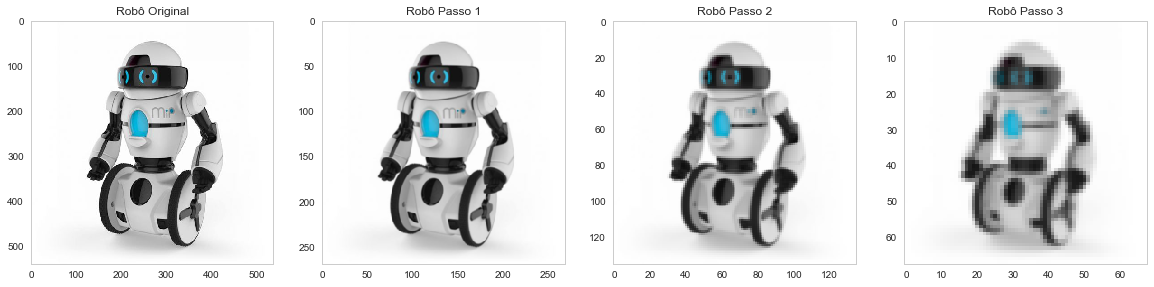

In [56]:
imagem = cv2.imread("imagens/robot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Para diminuir o tamanho, esta técnica utiliza a chamada Pirâmide Gaussiana

imagem_menor_1 = cv2.pyrDown(imagem)
imagem_menor_2 = cv2.pyrDown(imagem_menor_1)
imagem_menor_3 = cv2.pyrDown(imagem_menor_2)

plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.imshow(imagem)
plt.title("Robô Original")

plt.subplot(1,4,2)
plt.imshow(imagem_menor_1)
plt.title("Robô Passo 1")

plt.subplot(1,4,3)
plt.imshow(imagem_menor_2)
plt.title("Robô Passo 2")

plt.subplot(1,4,4)
plt.imshow(imagem_menor_3)
plt.title("Robô Passo 3")

Text(0.5,1,'Robô Passo 3')

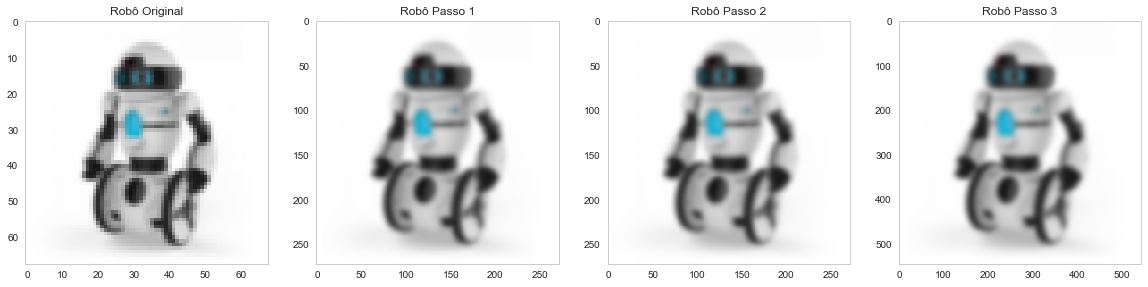

In [57]:
# Para aumentar o tamanho, esta técnica utiliza a chamada Pirâmide Laplaciana

imagem_maior_1 = cv2.pyrUp(imagem_menor_3)
imagem_maior_1 = cv2.pyrUp(imagem_maior_1)
imagem_maior_3 = cv2.pyrUp(imagem_maior_2)

plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.imshow(imagem_menor_3)
plt.title("Robô Original")

plt.subplot(1,4,2)
plt.imshow(imagem_maior_1)
plt.title("Robô Passo 1")

plt.subplot(1,4,3)
plt.imshow(imagem_maior_2)
plt.title("Robô Passo 2")

plt.subplot(1,4,4)
plt.imshow(imagem_maior_3)
plt.title("Robô Passo 3")

## 5. Transformação Homográfica (Não-Afim)

Text(0.5,1,'Portal')

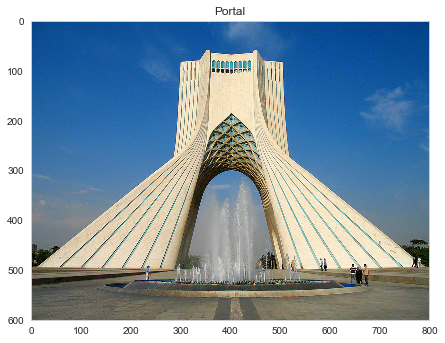

In [58]:
imagem = cv2.imread("imagens/portal.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(imagem)
plt.title("Portal")

600 800


Text(0.5,1,'Portal com Marcadores')

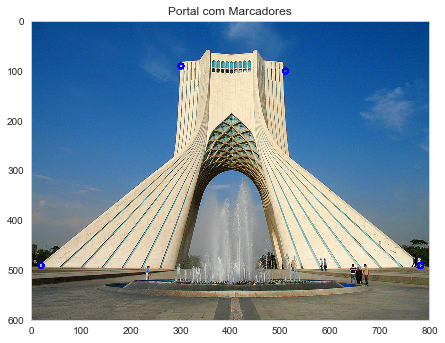

In [63]:
height, width = imagem.shape[:2]

imagem_marcadores = imagem.copy()

print(height, width)

pontos_marcadores = np.float32([[300,90],[510,100],[20,490],[780,490]])
pontos_destino = np.float32([[0,0],[800,0],[0,600],[800,600]])

# Adicionando marcadores para visualizar os pontos que serão expandidos

cv2.circle(imagem_marcadores, (300,90), 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, (510,100), 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, (20,490), 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, (780,490), 5, (0, 0, 255), 3)

plt.imshow(imagem_marcadores)
plt.title("Portal com Marcadores")

Text(0.5,1,'Portal com Marcadores')

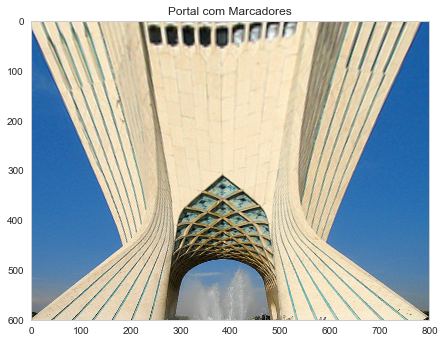

In [64]:
# Realizando a transformação não afim

matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(imagem,matriz_perspectiva,(800,600))

plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")

## 6. Recortando uma imagem

No OpenCV não existe uma função própria para recortar segmentos de uma imagem. Por outro lado, conseguimos fazer esta tarefa fácilmente aplicando diretamente na matriz da imagem as alterações.

Text(0.5,1,'Imagem Original')

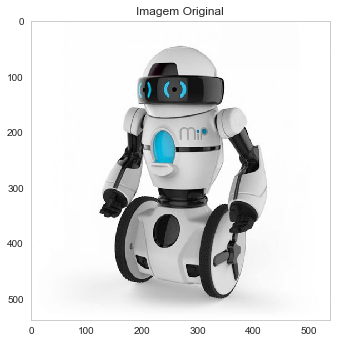

In [67]:
imagem = cv2.imread("imagens/robot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

height, width = imagem.shape[:2]

plt.imshow(imagem)
plt.title("Imagem Original")

Text(0.5,1,'Imagem Recortada')

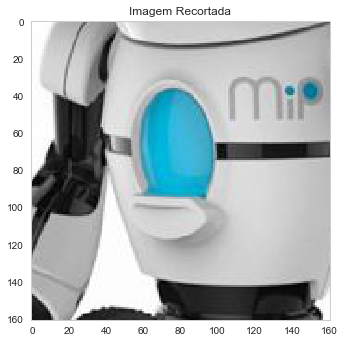

In [69]:
linha_inicio, coluna_inicio = int(height*0.3), int(width*0.3)
linha_final, coluna_final =  int(height*0.6), int(width*0.6)

imagem_recortada = imagem[linha_inicio:linha_final, coluna_inicio:coluna_final]

plt.imshow(imagem_recortada)
plt.title("Imagem Recortada")

## 7. Alterando brilho (nitidez) de uma imagem

Text(0.5,1,'Imagem Original')

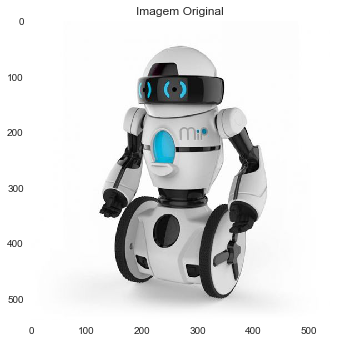

In [2]:
imagem = cv2.imread("imagens/robot.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_shape = imagem.shape

plt.imshow(imagem)
plt.title("Imagem Original")

Text(0.5,1,'Imagem Brilho')

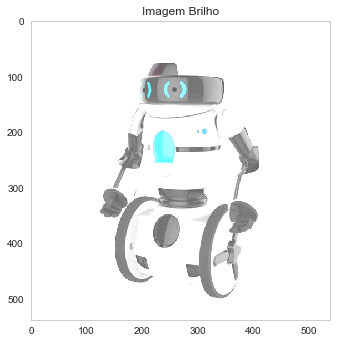

In [74]:
matriz_brilho = np.ones(imagem_shape, np.uint8) * 100
imagem_brilho = cv2.add(imagem, matriz_brilho)

plt.imshow(imagem_brilho)
plt.title("Imagem Brilho")

Text(0.5,1,'Imagem Escura')

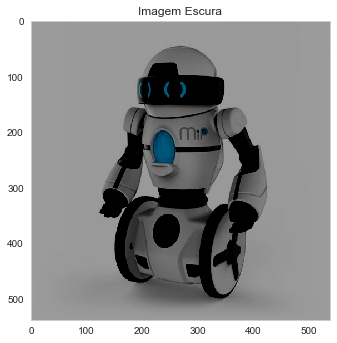

In [76]:
imagem_escura = cv2.subtract(imagem, matriz_brilho)

plt.imshow(imagem_escura)
plt.title("Imagem Escura")

## 8. Operações lógicas

As operações lógicas ou bitwise operations são operações do tipo and, or, xor e not. São utilizadas na composição de 2 imagens, criar máscaras e intersecções.

Text(0.5,1,'Retangulo')

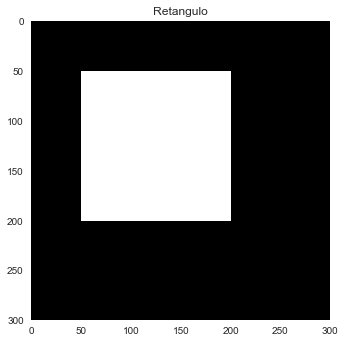

In [3]:
retangulo = np.zeros((300,300), np.uint8)
cv2.rectangle(retangulo, (50,50), (200,200), 255, -2)

plt.imshow(retangulo, cmap="gray")
plt.title("Retangulo")

Text(0.5,1,'Círculo')

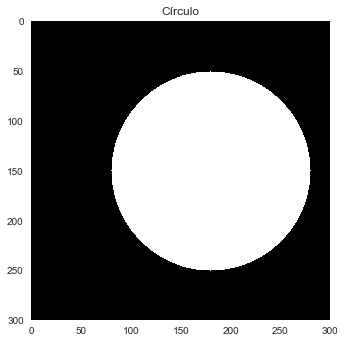

In [4]:
circulo = np.zeros((300,300), np.uint8)
cv2.circle(circulo,(180,150), 100, 255, -2)

plt.imshow(circulo, cmap="gray")
plt.title("Círculo")

Text(0.5,1,'Operação And (E)')

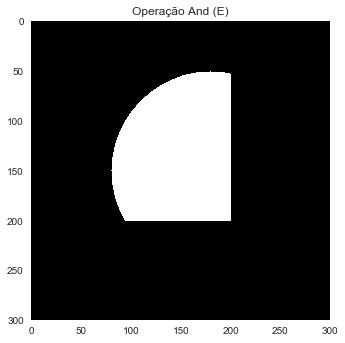

In [5]:
operacao_and = cv2.bitwise_and(retangulo, circulo)

plt.imshow(operacao_and, cmap="gray")
plt.title("Operação And (E)")

Text(0.5,1,'Operação Or (Ou)')

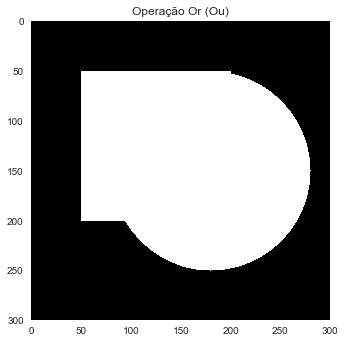

In [6]:
operacao_or = cv2.bitwise_or(retangulo, circulo)

plt.imshow(operacao_or, cmap="gray")
plt.title("Operação Or (Ou)")

Text(0.5,1,'Operação Xor (Ou Exclusivo)')

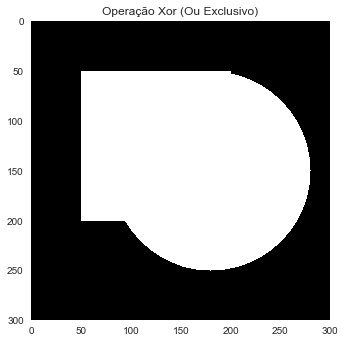

In [7]:
operacao_xor = cv2.bitwise_xor(retangulo, circulo)

plt.imshow(operacao_or, cmap="gray")
plt.title("Operação Xor (Ou Exclusivo)")

Text(0.5,1,'Operação Not (Negação)')

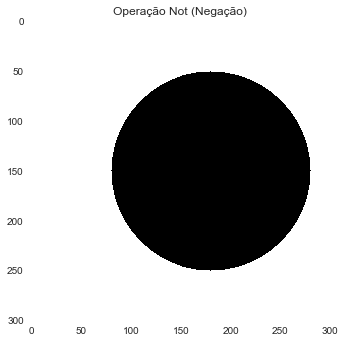

In [8]:
operacao_negacao = cv2.bitwise_not(circulo)

plt.imshow(operacao_negacao, cmap="gray")
plt.title("Operação Not (Negação)")